Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan
gr(size=(600,600));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchains);
# Use 4 observations
N2 = 4
n2 = Int.(9 * ones(Int, N2))
k2 = [6, 5, 7, 6]

4-element Array{Int64,1}:
 6
 5
 7
 6

Input data for cmdstan

In [5]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [6]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)

Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.024, 0.026, 0.024, 0.022) seconds, 0.095 seconds total
Sampling took (0.040, 0.035, 0.033, 0.033) seconds, 0.14 seconds total

                Mean     MCSE   StdDev     5%   50%   95%    N_Eff  N_Eff/s    R_hat
lp__             -27  2.8e-02  1.1e+00    -29   -27   -26  1.6e+03  1.1e+04  1.0e+00
accept_stat__   0.90  1.9e-03  1.4e-01   0.59  0.95   1.0  4.8e+03  3.4e+04  1.0e+00
stepsize__      0.91  4.8e-03  6.8e-03   0.90  0.92  0.92  2.0e+00  1.4e+01  4.0e+12
treedepth__      1.8  8.5e-03  5.2e-01    1.0   2.0   2.0  3.7e+03  2.6e+04  1.0e+00
n_leapfrog__     3.6  4.7e-02  2.7e+00    1.0   3.0   7.0  3.3e+03  2.4e+04  1.0e+00
divergent__     0.00      nan  0.0e+00   0.00  0.00  0.00      nan      nan      nan
energy__          28  3.8e-02  1.5e+00     26    28    31  1.6e+03  1.1e+04  1.0e+00
theta           0.66  1.2e-03  

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std       │ naive_se   │ mcse       │ ess    │
│     │ Symbol     │ Float64  │ Float64   │ Float64    │ Float64    │ Any    │
├─────┼────────────┼──────────┼───────────┼────────────┼────────────┼────────┤
│ 1   │ theta      │ 0.657551 │ 0.0768847 │ 0.00121565 │ 0.00121421 │ 4000.0 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ theta      │ 0.498973 │ 0.607157 │ 0.661027 │ 0.711059 │ 0.799407 │


Look at area of hpd

In [7]:
MCMCChains.hpd(chn)

HPD

│ Row │ parameters │ upper    │ lower   │
│     │ Symbol     │ Float64  │ Float64 │
├─────┼────────────┼──────────┼─────────┤
│ 1   │ theta      │ 0.506894 │ 0.80483 │

Plot the 4 chains

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = getindex(::ChainDataFrame, ::Symbol) at summarize.jl:22
└ @ MCMCChains /Users/rob/.julia/packages/MCMCChains/loNyJ/src/summarize.jl:22


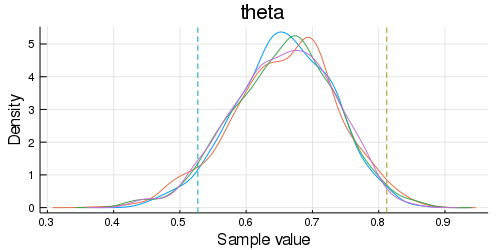

In [8]:
if rc == 0
  mixeddensity(chn, xlab="height [cm]", ylab="density")
  bnds = hpd(chn[:,1,1])
  vline!([bnds[:lower]], line=:dash)
  vline!([bnds[:upper]], line=:dash)
end

End of `clip-06-16s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*